# **PyTorch Operation and Basic Usage**

#### 학습 목표
1. 딥러닝 모델의 기본적인 연산 단위인 텐서를 생성하는 방법을 이해한다.

**Context**
1. 텐서(Tensor) 생성하기

In [ ]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

In [11]:
# PyTorch import
import torch

ModuleNotFoundError: No module named 'torch'

#1. 텐서(Tensor) 생성하기

>텐서란?
>
>텐서(tensor)는 일반적으로 데이터의 배열로 3차원 이상의 배열을 통칭한다. 1차원의 데이터 배열은 벡터(vector), 2차원의 데이터 배열은 행렬(matrix)로 부른다.
>
>PyTorch에서의 텐서는 1,2 차원의 데이터 배열 역시 표현이 가능하며, 기본적으로 이 텐서를 사용하여 딥러닝 모델의 입력 및 출력 값을 나타내고, 모델의 매개변수(parameter) 또한 텐서로 표현된다.
>
>지금부터 PyTorch에서 지원하는 다양한 종류의 텐서를 생성하며 각 텐서의 특성에 대해 살펴보고자 한다.

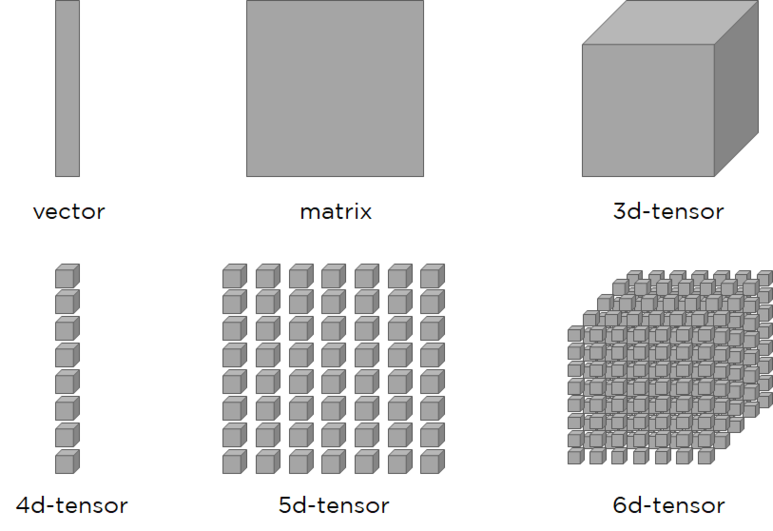

##1-1. 무작위 값을 가지는 텐서 생성

>무작위 숫자로 채워진 텐서를 반환한다.

`torch.rand(*size)` 
- 0~1 사이의 연속균등분포 (uniform distribution) $\mathcal{U}(0,1)$ 에서 값을 추출해 텐서를 생성한다. 텐서의 크기는 `size`를 통해 지정할 수 있다.

In [ ]:
# torch.rand(size)

# 0~1 사이의 연속균등분포에서 값을 추출해 사이즈가 4인 1차원 텐서를 생성
x1 = torch.rand(4)
print('x1:')
print(f'{x1}\n')

# 0~1 사이의 연속균등분포에서 값을 추출해 사이즈 2x3인 2차원 텐서를 생성
x2 = torch.rand(2,3)
print('x2:')
print(f'{x2}')

x1:
tensor([0.1092, 0.3799, 0.6915, 0.7515])

x2:
tensor([[0.2527, 0.3374, 0.5495],
        [0.7709, 0.9381, 0.6255]])


`torch.randn(*size)` 
- 평균이 0이고, 표준편차가 1인 표준정규분포 (standard normal distribution) $\mathcal{N}(0,1)$ 에서 값을 추출해 텐서를 생성한다.

In [ ]:
# torch.randn(size)

# 평균 0, 표준편차는 1인 정규분포에서 값을 추출
x = torch.randn(2,3)
print(x)

tensor([[-0.2607,  1.0062,  0.9049],
        [-0.0491,  0.8472,  0.8885]])


`torch.randint(low=0, high, size)`
- low 이상 high 미만의 무작위 정수에서 값을 추출해 텐서를 생성한다. 

In [ ]:
#torch.randint(low, high, size)
x1 = torch.randint(3, 5, (3,))
print('x1:')
print(f'{x1}\n')

x2 = torch.randint(10, (2,2))
print('x2:')
print(x2)

x1:
tensor([4, 4, 3])

x2:
tensor([[7, 3],
        [6, 4]])


`torch.randperm(n)` 
- 0 ~ n-1 까지의 정수를 무작위로 permutation(shuffle)한 텐서를 생성한다.

In [ ]:
# torch.randperm(n)
# 0부터 n-1까지의 정수를 무작위로 정렬
x = torch.randperm(5)
print(x)

tensor([3, 0, 1, 2, 4])


##1-2. 지정된 값을 가지는 텐서 생성


`torch.tensor(data)`
- data를 copy한 텐서를 생성한다. data는 list, tuple, NumPy ndarray, scalar 등의 type을 가진 object이다.

In [ ]:
x = torch.tensor([])  # empty 텐서 생성 (size (0,))
print(x)

tensor([])


In [ ]:
x = torch.tensor(3.14159)  # zero-dimensional 텐서 생성 (scalar) 
print(x)

tensor(3.1416)


In [ ]:
x = torch.tensor([0.1, 1.2]) # one-dimensional 텐서 생성 (list)
print(x)

tensor([0.1000, 1.2000])


In [ ]:
x = torch.tensor([[0.1, 1.2], [2.2, 3.1], [4.9, 5.2]]) # two-dimensional 텐서 생성 (list of lists)
print(x)

tensor([[0.1000, 1.2000],
        [2.2000, 3.1000],
        [4.9000, 5.2000]])


`torch.empty(size)`
- size 크기의 초기화 되지 않은(uninitialized) 값을 가진 텐서를 생성한다.

In [ ]:
x = torch.empty(2,3)
print(x)

tensor([[1.7046e-34, 0.0000e+00, 3.5032e-44],
        [0.0000e+00,        nan, 1.7290e+00]])


`torch.zeros(size)`
- size 크기의 0으로 초기화된 텐서를 생성한다.

In [ ]:
x = torch.zeros(2,3)
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


`torch.ones(size)`
- size 크기의 1의 값으로 구성된 텐서를 생성한다.


In [ ]:
x = torch.ones(2,3)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


 - `torch.ones(size)`으로 생성된 텐서에 특정 수 n을 곱하면, n으로 채워진 텐서를 생성할 수 있다.

In [ ]:
n = 7
x = torch.ones(2,3) * n
print(x)

tensor([[7., 7., 7.],
        [7., 7., 7.]])


`torch.arange(start,end,step=1)`
- start값부터 end값 이전까지 step만큼 더한 값을 가지는 텐서를 생성한다. 

In [ ]:
x = torch.arange(0,3,step=0.5)
print(x)

tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000])


##1-3. 텐서 Data Type

>텐서를 객체에 할당할 때 argument를 이용하면 텐서의 data type을 지정할 수 있다.
>
>주로 사용되는 Data Type은 다음과 같다:

| Data type               | dtype                                         | Tensor types                 |
|:-------------------------|:-----------------------------------------------|:------------------------------|
| 32-bit floating point   | ``` torch.float32 ``` or ``` torch.float ```  | ``` torch.*.FloatTensor ```  |
| 64-bit floating point   | ``` torch.float64 ``` or ``` torch.double ``` | ``` torch.*.DoubleTensor ``` |
| 16-bit floating point   | ``` torch.float16 ``` or ``` torch.half ```   | ``` torch.*.HalfTensor ```   |
| 16-bit integer (signed) | ``` torch.int16 ``` or ``` torch.short ```    | ``` torch.*.ShortTensor ```  |
| 32-bit integer (signed) | ``` torch.int32 ``` or ``` torch.int ```      | ``` torch.*.IntTensor ```    |
| 64-bit integer (signed) | ``` torch.int64 ``` or ``` torch.long ```     | ``` torch.*.LongTensor ```   |

>생성된 텐서의 `type()` function을 통해 해당 텐서의 Tensor type을 반환할 수 있다.

In [ ]:
#텐서 생성함수의 dtype argument를 지정해주면 생성되는 텐서의 data type을 지정할 수 있다.

x1 = torch.ones(2,3, dtype=torch.float) # torch.float type의 텐서 생성
x2 = torch.ones(2,3, dtype=torch.double) # torch.double type의 텐서 생성
x3 = torch.ones(2,3, dtype=torch.half) # torch.half type의 텐서 생성
x4 = torch.ones(2,3, dtype=torch.short) # torch.short type의 텐서 생성
x5 = torch.ones(2,3, dtype=torch.int) # torch.int type의 텐서 생성
x6 = torch.ones(2,3, dtype=torch.long) # torch.long type의 텐서 생성

print('x1:')
print(f'{x1}')
print(f'{x1.type()}\n\n') # tensor.type() 함수를 통해 해당 함수의 Tensor type을 출력

print('x2:')
print(f'{x2}')
print(f'{x2.type()}\n\n')

print('x3:')
print(f'{x3}')
print(f'{x3.type()}\n\n')

print('x4:')
print(f'{x4}')
print(f'{x4.type()}\n\n')

print('x5:')
print(f'{x5}')
print(f'{x5.type()}\n\n')

print('x6:')
print(f'{x6}')
print(f'{x6.type()}\n\n')

x1:
tensor([[1., 1., 1.],
        [1., 1., 1.]])
torch.FloatTensor


x2:
tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
torch.DoubleTensor


x3:
tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float16)
torch.HalfTensor


x4:
tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)
torch.ShortTensor


x5:
tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int32)
torch.IntTensor


x6:
tensor([[1, 1, 1],
        [1, 1, 1]])
torch.LongTensor




>`tensor.dtype`을 통해 텐서의 `dtype`을 바로 출력할 수 있다.

In [ ]:
x = torch.ones(2,3, dtype=torch.float)
print(x.type()) # Tensor type 출력
print(x.dtype) # dtype 출력

torch.FloatTensor
torch.float32


In [ ]:
x1 = torch.arange(0,3, step=1, dtype=torch.float) # torch.float type의 텐서 생성
x2 = torch.arange(0,3, step=1, dtype=torch.double) # torch.double type의 텐서 생성
x3 = torch.arange(0,3, step=1, dtype=torch.half) # torch.half type의 텐서 생성
x4 = torch.arange(0,3, step=1, dtype=torch.short) # torch.short type의 텐서 생성
x5 = torch.arange(0,3, step=1, dtype=torch.int) # torch.int type의 텐서 생성
x6 = torch.arange(0,3, step=1, dtype=torch.long) # torch.long type의 텐서 생성

print('x1:')
print(f'{x1}')
print(f'{x1.type()}\n\n')

print('x2:')
print(f'{x2}')
print(f'{x2.type()}\n\n')

print('x3:')
print(f'{x3}')
print(f'{x3.type()}\n\n')

print('x4:')
print(f'{x4}')
print(f'{x4.type()}\n\n')

print('x5:')
print(f'{x5}')
print(f'{x5.type()}\n\n')

print('x6:')
print(f'{x6}')
print(f'{x6.type()}\n\n')

x1:
tensor([0., 1., 2.])
torch.FloatTensor


x2:
tensor([0., 1., 2.], dtype=torch.float64)
torch.DoubleTensor


x3:
tensor([0., 1., 2.], dtype=torch.float16)
torch.HalfTensor


x4:
tensor([0, 1, 2], dtype=torch.int16)
torch.ShortTensor


x5:
tensor([0, 1, 2], dtype=torch.int32)
torch.IntTensor


x6:
tensor([0, 1, 2])
torch.LongTensor




>`dtype`설정 없이 텐서를 생성하는 경우 기본적으로 `torch.float` type의 텐서(=`torch.FloatTensor`)가 생성된다.

In [ ]:
x1 = torch.ones(2,3)
print('x1:')
print(f'{x1}')
print(f'{x1.type()}\n\n')

x2 = torch.zeros(2,3)
print('x2:')
print(f'{x2}')
print(f'{x2.type()}\n\n')

x3 = torch.empty(2,3)
print('x3:')
print(f'{x3}')
print(f'{x3.type()}\n\n')

x1:
tensor([[1., 1., 1.],
        [1., 1., 1.]])
torch.FloatTensor


x2:
tensor([[0., 0., 0.],
        [0., 0., 0.]])
torch.FloatTensor


x3:
tensor([[5.7538e-34, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])
torch.FloatTensor




>`torch.tensor`를 이용해 텐서를 생성하는 경우 `dtype`을 따로 설정해주지 않으면, type inference 과정을 통해 자동으로 텐서의 data type을 설정한다.
>
>data의 값 중 한개 이상이 float 일 경우 `torch.float` type의 텐서가 생성되고, 모든 값이 integer일 경우 `torch.long` type의 텐서가 생성된다.

In [ ]:
# dtype을 설정하지 않을 경우 data의 type에 따라 자동으로 Type inference
x1 = torch.tensor([5.5,3.3]) # torch.float type을 가지는 텐서 생성
print('x1:')
print(f'{x1}')
print(f'{x1.type()}\n\n')

x2 = torch.tensor([5.5,3]) # torch.float type을 가지는 텐서 생성
print('x2:')
print(f'{x2}')
print(f'{x2.type()}\n\n')

x3 = torch.tensor([5, 3]) # torch.long type을 가지는 텐서 생성
print('x3:')
print(f'{x3}')
print(f'{x3.type()}\n\n')

x1:
tensor([5.5000, 3.3000])
torch.FloatTensor


x2:
tensor([5.5000, 3.0000])
torch.FloatTensor


x3:
tensor([5, 3])
torch.LongTensor




>`dtype`을 설정하는 대신, `torch.FloatTensor`, `torch.LongTensor` 등을 활용하여 data type을 지정할 수 있다.

In [ ]:
# torch.FloatTensor(size or list)
x1 = torch.FloatTensor(2,3) # 2x3 사이즈의 float tensor 생성
print('x1:')
print(f'{x1}')
print(f'{x1.type()}\n\n')

x2 = torch.FloatTensor([2,3]) # [2,3] 값을 가지는 float tensor 생성
print('x2:')
print(f'{x2}')
print(f'{x2.type()}\n\n')

x3 = torch.tensor([2,3], dtype=torch.float32) # [2,3] 값을 가지는 float tensor 생성
print('x3:')
print(f'{x3}')
print(f'{x3.type()}\n\n')

print('x2==x3')
print(x2 == x3) # 두 방법 모두 같은 텐서를 반환

x1:
tensor([[5.7539e-34, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])
torch.FloatTensor


x2:
tensor([2., 3.])
torch.FloatTensor


x3:
tensor([2., 3.])
torch.FloatTensor


x2==x3
tensor([True, True])


`tensor.type(dtype)`
- `type()` 함수를 이용하면, 텐서의 dtype(데이터 타입)을 변환할 수 있다.
- 텐서 생성시 `dtype`을 원하는 타입으로 설정하지 않았거나, operation을 하는 도중 타입을 바꾸어야 할 때 사용한다.

In [ ]:
# tensor type 변환
x1 = torch.FloatTensor([2,3])
x2 = torch.LongTensor([3,4])
print('x1:')
print(f'{x1}')
print(f'{x1.type()}\n\n')

x1 = x1.type(x2.dtype) # .type() 함수를 이용한 dtype 변환
print('x1:')
print(f'{x1}')
print(f'{x1.type()}\n\n')

x1:
tensor([2., 3.])
torch.FloatTensor


x1:
tensor([2, 3])
torch.LongTensor




`tensor.to(dtype)`
- 위의 `type()`함수와 같은 역할을 하며, `dtype`을 변환할 때 가장 자주 사용되는 방식이다.
- 그 이유는, 이를 통해 type 변환 뿐만 아니라 추후에 다룰 device 변환까지 행할 수 있기 때문이다.

In [ ]:
# dtype 변환
x1 = torch.FloatTensor([2,3])
x2 = torch.LongTensor([3,4])
print('x1:')
print(f'{x1}')
print(f'{x1.type()}\n\n')

x1 = x1.to(x2.dtype) # .to() 함수를 통한 dtype 변환
print('x1:')
print(f'{x1}')
print(f'{x1.type()}\n\n')

x1:
tensor([2., 3.])
torch.FloatTensor


x1:
tensor([2, 3])
torch.LongTensor




>이외에도 tensor.long()`, `tensor.short()`, `tensor.int()`, `tensor.float()`, `tensor.double()`, `tensor.half()` 등을 사용하여 `dtype`을 변환할 수 있다.

In [ ]:
x = torch.tensor([2,3])

x = x.long()
print('x.long():')
print(f'{x}')
print(f'{x.type()}\n\n')

x = x.short()
print('x.short():')
print(f'{x}')
print(f'{x.type()}\n\n')

x = x.int()
print('x.int():')
print(f'{x}')
print(f'{x.type()}\n\n')

x = x.float()
print('x.float():')
print(f'{x}')
print(f'{x.type()}\n\n')

x = x.double()
print('x.double():')
print(f'{x}')
print(f'{x.type()}\n\n')

x = x.half()
print('x.half():')
print(f'{x}')
print(f'{x.type()}\n\n')

x.long():
tensor([2, 3])
torch.LongTensor


x.short():
tensor([2, 3], dtype=torch.int16)
torch.ShortTensor


x.int():
tensor([2, 3], dtype=torch.int32)
torch.IntTensor


x.float():
tensor([2., 3.])
torch.FloatTensor


x.double():
tensor([2., 3.], dtype=torch.float64)
torch.DoubleTensor


x.half():
tensor([2., 3.], dtype=torch.float16)
torch.HalfTensor




`tensor.type_as(tensor)`
- tensor type을 입력된 tensor의 type과 같도록 변환한다.


In [ ]:
# tensor.type_as(tensor)
x1 = torch.FloatTensor([2,3])
x2 = torch.LongTensor([3,4])

print('x1:')
print(f'{x1}')
print(f'{x1.type()}\n\n')

x1 = x1.type_as(x2) # x2의 dtype으로 x1의 dtype 변환
print('x1.type_as(x2):')
print(f'{x1}')
print(f'{x1.type()}\n\n')

x1:
tensor([2., 3.])
torch.FloatTensor


x1.type_as(x2):
tensor([2, 3])
torch.LongTensor




⚠ Caution: Type casting으로 인한 정보 손실
- Float -> long casting시 소숫점은 모두 내림 처리된다.
- Long으로 변환 시, 소숫점 자리의 소실을 막고 싶다면 미리 `torch.round`로 해당 텐서를 소숫점을 반올림한 후, long으로 변환해야 한다.

In [ ]:
x = torch.tensor([2.3, 3.845], dtype=torch.float)
print('x:')
print(f'{x}')
print(f'{x.type()}\n\n')

x_long_bad = x.to(torch.long)
print('x_long_bad:')
print(f'{x_long_bad}')
print(f'{x_long_bad.type()}\n\n')

x_long_round = torch.round(x).to(torch.long)
print('x_long_round:')
print(f'{x_long_round}')
print(f'{x_long_round.type()}\n\n')

x:
tensor([2.3000, 3.8450])
torch.FloatTensor


x_long_bad:
tensor([2, 3])
torch.LongTensor


x_long_round:
tensor([2, 4])
torch.LongTensor




##1-4. _like 함수

`torch.randn_like(tensor)`
- 표준정규분포에서 추출된 값들로 이뤄진 input 텐서와 동일한 사이즈의 텐서를 생성한다.
- `torch.randn(tensor.size(), dtype=tensor.dtype, layout=tensor.layout, device=tensor.device)` 와 동일한 역할을 수행한다.

In [ ]:
x = torch.ones(5,3, dtype=torch.double) #5x3 사이즈의 2차원 텐서를 생성
print('x:')
print(f'{x}\n')

x2 = torch.randn_like(x,dtype=torch.float) # 같은 size에서 N(0,1)에서 추출된 값으로 구성된 텐서를 생성
print('x2:')
print(f'{x2}\n')

x:
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

x2:
tensor([[-0.3777,  0.1851,  1.5487],
        [ 0.0347, -2.1047, -0.7431],
        [ 0.4214,  2.2990,  0.5392],
        [-2.6591, -0.4380,  0.3307],
        [ 0.3848, -0.1043, -0.5862]])



>`torch.rand_like`, `torch.ones_like`, `torch.zeros_like`를 사용해 텐서를 생성할 수 있다.

In [ ]:
x2 = torch.rand_like(x) # 같은 size의 U(0,1)에서 추출한 무작위 값으로 구성된 텐서를 생성
print('x2:')
print(f'{x2}\n')

x3 = torch.ones_like(x) # 같은 size의 모든 원소가 1로 구성된 텐서를 생성
print('x3:')
print(f'{x3}\n')

x4 = torch.zeros_like(x) # 같은 size의 모든 원소가 0으로 구성된 텐서를 생성
print('x4:')
print(f'{x4}\n')

x2:
tensor([[0.5952, 0.5853, 0.1589],
        [0.2080, 0.0337, 0.0406],
        [0.4707, 0.9084, 0.8133],
        [0.6056, 0.9141, 0.1552],
        [0.9155, 0.5498, 0.6747]], dtype=torch.float64)

x3:
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

x4:
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)



>`_like` 함수를 사용할 때 `dtype`을 별도로 지정해줄 수 있다.

In [ ]:
# torch.float type 텐서 생성

x2 = torch.randn_like(x,dtype=torch.float)
print('x2:')
print(f'{x2}\n')

x3 = torch.rand_like(x,dtype=torch.float) 
print('x3:')
print(f'{x3}\n')

x4 = torch.ones_like(x,dtype=torch.float) 
print('x4:')
print(f'{x4}\n')

x5 = torch.zeros_like(x,dtype=torch.float) 
print('x5:')
print(f'{x5}\n')

x2:
tensor([[ 3.2434,  0.0213,  0.4262],
        [ 1.0706, -0.3902, -1.3737],
        [ 0.6329,  0.0291,  0.3438],
        [ 1.3205, -0.4735,  1.4121],
        [ 1.5484, -0.4569,  0.2962]])

x3:
tensor([[0.6922, 0.8357, 0.4489],
        [0.0744, 0.3238, 0.2143],
        [0.5551, 0.9065, 0.0789],
        [0.6504, 0.0718, 0.8783],
        [0.0355, 0.1931, 0.1242]])

x4:
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

x5:
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])



## 1-5. 텐서 초기화 (Initialization)

>`torch.nn.init`라이브러리를 활용해서, 텐서를 생성한 후에 원하는 값이나 분포로 초기화 할 수 있다.
>
>일반적으로 neural network의 parameter를 원하는 분포로 초기화하는 데 사용된다.

\

`torch.nn.init.uniform_(tensor, a=0., b=1.)`
- tensor를 연속균등분포(uniform distribution) $\mathcal{U}(a,b)$ 에서 추출된 값으로 초기화한다. 

`torch.nn.init.normal_(tensor, mean=0.0, std=1.0)`
- tensor를 정규분포(normal distribution) $\mathcal{N}(mean, std^2)$ 에서 샘플된 값으로 초기화한다.

`torch.nn.init.constant_(tensor, val)`
- tensor를 val 값으로 초기화한다.

In [ ]:
import torch.nn.init as init

w = torch.empty(3, 5)
print('w before initialization:')
print(f'{w}\n')

init.uniform_(w,a=0,b=9) 
print('uniform:')
print(f'{w}\n')

init.normal_(w,std=0.2)
print('normal:')
print(f'{w}\n')

init.constant_(w,3.1415)
print('constant:')
print(f'{w}\n')

w before initialization:
tensor([[5.7546e-34, 0.0000e+00, 2.3694e-38, 1.2598e-01, 6.9391e-02],
        [3.5919e-02, 4.2118e-02, 1.5249e-01, 4.8570e-01, 1.2285e-01],
        [8.4493e-02, 2.3162e-01, 1.8927e-01, 8.5335e-02, 2.5867e-01]])

uniform:
tensor([[4.8447, 6.8348, 6.7857, 5.3885, 4.5432],
        [3.9828, 5.8815, 8.3550, 6.4959, 6.0951],
        [0.8802, 2.4604, 7.6153, 7.7522, 2.4641]])

normal:
tensor([[ 0.2380, -0.0282, -0.1354,  0.1961,  0.1586],
        [-0.0883, -0.0377,  0.0049, -0.0317, -0.0577],
        [-0.1746,  0.3415,  0.0324,  0.3611, -0.2183]])

constant:
tensor([[3.1415, 3.1415, 3.1415, 3.1415, 3.1415],
        [3.1415, 3.1415, 3.1415, 3.1415, 3.1415],
        [3.1415, 3.1415, 3.1415, 3.1415, 3.1415]])



>`.uniform_` 같이 마지막에 "_" 이 붙어있는 함수를 *in-place operation* 라고 부른다. 
>
>In-place operation은 input 텐서 자체를 변경시키는 함수로서, 별도의 메모리 할당을 요구하지 않는다.
>
>기존 텐서를 overwrite하기 때문에, 메모리 사용을 줄이기 위해 사용되기도 한다. 

```python
init.constant_(w,3.1415)  (0)
w = init.constant_(w,3.1415)  (x)

```

##1-6. 텐서 Size

>`tensor.size()` 함수와 `tensor.shape` attribute을 통해 생성된 텐서의 사이즈를 반환할 수 있다.

In [ ]:
# tensor.size()
x = torch.FloatTensor(10,12,3,3)

print(f'x.size():') 
print(f'{x.size()}\n') # size() 함수를 통해 x의 size 반환

print(f'x.size()[0]:')
print(f'{x.size()[0]}\n') # x의 0번째 차원의 size 반환

print(f'x.shape:')
print(f'{x.shape}\n') # shape attribute을 통해 x의 size 반환

print(f'x.shape[0]:') 
print(f'{x.shape[0]}\n') # x의 0번째 차원의 size 반환

x.size():
torch.Size([10, 12, 3, 3])

x.size()[0]:
10

x.shape:
torch.Size([10, 12, 3, 3])

x.shape[0]:
10



`tensor[index]`
- 텐서의 index번째에 해당하는 값을 반환한다.
- index가 -n일 경우 뒤에서 n번째 값을 반환한다.

In [ ]:
x = torch.tensor([2, 4, 1, 7, 0, 9])

print('x[0]:')
print(f'{x[0]}\n')

print('x[3]:')
print(f'{x[3]}\n')

print('x[-1]:')
print(f'{x[-1]}\n') # 뒤에서 1번째 값 반환

print('x[-2]:')
print(f'{x[-2]}\n') # 뒤에서 2번째 값 반환

x[0]:
2

x[3]:
7

x[-1]:
9

x[-2]:
0



`tensor[start_index:end_index]`
- 텐서의 start_index와 end_index 사이의 값을 반환한다.
- start_index의 값은 포함하며, end_index의 값은 포함하지 않는다.
- start_index가 생략될 경우 맨 첫 값부터 end_index 이전 값까지 반환되고, end_index가 생략될 경우 start_index부터 마지막 값까지 반환된다. 

In [ ]:
x = torch.tensor([2, 4, 1, 7, 0, 9])

print('x[1:5]:')
print(f'{x[1:5]}\n')

print('x[:4]:')
print(f'{x[:4]}\n') # start_index 생략

print('x[3:]:')
print(f'{x[3:]}\n') # end_index 생략

print('x[:]:')
print(f'{x[:]}\n') # 둘 다 생략할 경우 동일한 텐서 반환

x[1:5]:
tensor([4, 1, 7, 0])

x[:4]:
tensor([2, 4, 1, 7])

x[3:]:
tensor([7, 0, 9])

x[:]:
tensor([2, 4, 1, 7, 0, 9])



>2차원 이상의 텐서일 경우 index에 해당하는 텐서가 반환된다.

In [ ]:
x = torch.tensor([[1, 2, 1], [3, 8, 4]])

print('x:')
print(f'{x}\n')

print('x[1]:')
print(f'{x[1]}\n') # 첫번째 차원의 1번 index 텐서 반환

print('x[1][2]:')
print(f'{x[1][2]}\n') # 첫번째 차원의 1번 index 텐서의 2번 index 값 반환

x:
tensor([[1, 2, 1],
        [3, 8, 4]])

x[1]:
tensor([3, 8, 4])

x[1][2]:
4



>Indexing을 통해 텐서의 값을 바꿀 수 있다.

In [ ]:
x = torch.tensor([[1, 2, 1], [3, 8, 4]])
print('x:')
print(f'{x}\n')

x[0][0] = 7 # (0,0) index의 value를 7로 변경

print('x:')
print(f'{x}\n')

x:
tensor([[1, 2, 1],
        [3, 8, 4]])

x:
tensor([[7, 2, 1],
        [3, 8, 4]])



`torch.chunk(input, chunks, dim=0)`
- 텐서를 지정된 dimension `dim`을 따라 chunks 개수로 나눈다.

In [ ]:
x = torch.arange(11)
print('x:')
print(f'{x}\n')

x_chunk = x.chunk(6)
print('x_chunk:')
print(f'{x_chunk}\n')

x2 = torch.tensor([[1, 2, 1, 5, 6], [3, 8, 4, 2, 7]]) # 2차원 텐서
print('x2:')
print(f'{x2}\n')

x_chunk2 = x2.chunk(2, dim=1) # dim 1에 대해 2개로 분리
print('x_chunk2:')
print(f'{x_chunk2}\n')

x:
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

x_chunk:
(tensor([0, 1]), tensor([2, 3]), tensor([4, 5]), tensor([6, 7]), tensor([8, 9]), tensor([10]))

x2:
tensor([[1, 2, 1, 5, 6],
        [3, 8, 4, 2, 7]])

x_chunk2:
(tensor([[1, 2, 1],
        [3, 8, 4]]), tensor([[5, 6],
        [2, 7]]))



`torch.split(tensor, split_size_or_sections, dim=0)`
- `split_size_or_sections`가 정수일 경우, 텐서를 지정된 dimension `dim`을 따라 `split_size_or_sections` 크기로 나눈다.
- `split_size_or_sections`가 list일 경우, len(split_size_or_sections) chunk로 나눈다. 각각의 chunk는 list 원소의 크기이다.

In [ ]:
x = torch.tensor([[0,1], [2,3], [4,5], [6,7], [8,9]])
print('x:')
print(f'{x}\n')

x_split1 = torch.split(x, 2) # dim 0을 size 2 단위로 분리
print('x_split1:')
print(f'{x_split1}\n')

x_split2 = torch.split(x, [1,4]) # dim 0을 size 1,4로 분리
print('x_split2:')
print(f'{x_split2}\n')

x:
tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

x_split1:
(tensor([[0, 1],
        [2, 3]]), tensor([[4, 5],
        [6, 7]]), tensor([[8, 9]]))

x_split2:
(tensor([[0, 1]]), tensor([[2, 3],
        [4, 5],
        [6, 7],
        [8, 9]]))



`torch.cat(tensors, dim=0)`
- 지정된 dimension을 따라 텐서들을 잇는다(concatenate, concat).

In [ ]:
x = torch.randn(1,3)

print('x')
print(x.shape)
print(f'{x}\n')


x_cat1 = torch.cat((x, x, x), 0) # 0번 dimension을 따라 concat
print('x_cat1')
print(x_cat1.shape)
print(f'{x_cat1}\n')

x_cat2 = torch.cat((x, x), 1) # 1번 dimension을 따라 concat
print('x_cat2')
print(x_cat2.shape)
print(f'{x_cat2}\n')

x
torch.Size([1, 3])
tensor([[0.7322, 0.0589, 1.2881]])

x_cat1
torch.Size([3, 3])
tensor([[0.7322, 0.0589, 1.2881],
        [0.7322, 0.0589, 1.2881],
        [0.7322, 0.0589, 1.2881]])

x_cat2
torch.Size([1, 6])
tensor([[0.7322, 0.0589, 1.2881, 0.7322, 0.0589, 1.2881]])



`torch.stack(tensors, dim=0)`
- 지정된 **새로운** dimension을 추가하여 텐서들을 잇는다(concatenate). 
- 모든 텐서는 같은 shape을 가져야한다.

In [ ]:
x = torch.randn(1,3)

print('x')
print(x.shape)
print(f'{x}\n')


x_stack1 = torch.stack((x, x, x), 0) # 0번 dimension을 따라 stack
print('x_stack1')
print(x_stack1.shape)
print(f'{x_stack1}\n')

x_stack2 = torch.stack((x, x), 1) # 1번 dimension을 따라 stack
print('x_stack2')
print(x_stack2.shape)
print(f'{x_stack2}\n')

x_stack3 = torch.stack((x, x, x, x), 2) # 2번 dimension을 따라 stack
print('x_stack3')
print(x_stack3.shape)
print(f'{x_stack3}\n')

x
torch.Size([1, 3])
tensor([[-0.0035,  0.3005,  0.9700]])

x_stack1
torch.Size([3, 1, 3])
tensor([[[-0.0035,  0.3005,  0.9700]],

        [[-0.0035,  0.3005,  0.9700]],

        [[-0.0035,  0.3005,  0.9700]]])

x_stack2
torch.Size([1, 2, 3])
tensor([[[-0.0035,  0.3005,  0.9700],
         [-0.0035,  0.3005,  0.9700]]])

x_stack3
torch.Size([1, 3, 4])
tensor([[[-0.0035, -0.0035, -0.0035, -0.0035],
         [ 0.3005,  0.3005,  0.3005,  0.3005],
         [ 0.9700,  0.9700,  0.9700,  0.9700]]])



`Tensor.repeat(*sizes)`
- 텐서의 각 차원을 `sizes`에 명시된 숫자만큼 반복한 텐서를 반환한다.

In [ ]:
x = torch.tensor([[1, 2, 3],[4,5,6]])
print('x: ')
print(x)
print('x.size():')
print(f'{x.size()}\n')

x_r = x.repeat(2, 3)
print('x_r: ')
print(x_r)
print('x_r.size():')
print(x_r.size())

x: 
tensor([[1, 2, 3],
        [4, 5, 6]])
x.size():
torch.Size([2, 3])

x_r: 
tensor([[1, 2, 3, 1, 2, 3, 1, 2, 3],
        [4, 5, 6, 4, 5, 6, 4, 5, 6],
        [1, 2, 3, 1, 2, 3, 1, 2, 3],
        [4, 5, 6, 4, 5, 6, 4, 5, 6]])
x_r.size():
torch.Size([4, 9])


In [ ]:
# Dimension 개수가 다른 경우 새로운 차원이 생성됨
x = torch.tensor([1, 2, 3])
print('x: ')
print(x)
print('x.size():')
print(f'{x.size()}\n')

x_r = x.repeat(4, 2)
print('x_r: ')
print(x_r)
print('x_r.size():')
print(x_r.size())

x: 
tensor([1, 2, 3])
x.size():
torch.Size([3])

x_r: 
tensor([[1, 2, 3, 1, 2, 3],
        [1, 2, 3, 1, 2, 3],
        [1, 2, 3, 1, 2, 3],
        [1, 2, 3, 1, 2, 3]])
x_r.size():
torch.Size([4, 6])


`Tensor.expand(*sizes)`
- 텐서의 각 차원을 `sizes`에 명시된 사이즈를 갖도록 확장된 텐서를 반환한다.
- 차원 사이즈를 바꾸지 않고자 하는 경우 -1을 사용한다.

In [ ]:
x = torch.tensor([[1], [2], [3]])
print('x:')
print(x)
print('x.size():')
print(f'{x.size()}\n')

x_e1= x.expand(3, 4)
print('x_e1:')
print(x_e1)
print('x_e1.size():')
print(f'{x_e1.size()}\n')

x_e2 = x.expand(-1, 4) 
print('x_e2:')
print(x_e2)
print('x_e2.size():')
print(f'{x_e2.size()}\n') # x_e1 과 x_e2의 결과 동일

x:
tensor([[1],
        [2],
        [3]])
x.size():
torch.Size([3, 1])

x_e1:
tensor([[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3]])
x_e1.size():
torch.Size([3, 4])

x_e2:
tensor([[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3]])
x_e2.size():
torch.Size([3, 4])

